The number of principal components for 80% cumulative explained variance is: 21


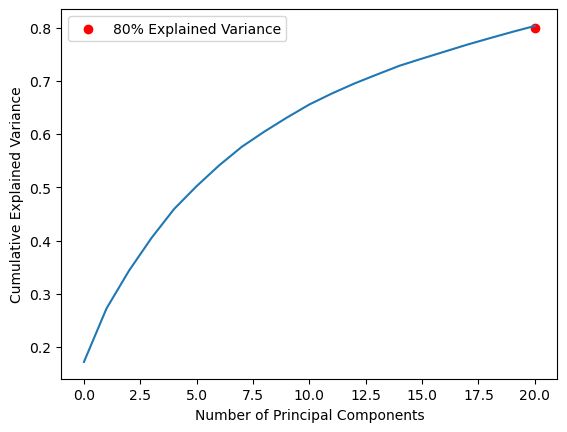

In [79]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the Axes3D class

# Code to load binary strings
file_path = "./data/Cleaned data/BPMNcleaned.csv"

try:
    df = pd.read_csv(file_path, sep=',', engine='python', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, sep=',', engine='python', encoding='latin-1')

if df.shape[1] > 1:
    df = df.drop(columns=df.columns[0])

# Calculate cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index where cumulative explained variance exceeds 80%
index_80_percent = np.where(cumulative_variance_ratio >= 0.8)[0][0]

components_80_percent = pca.components_[:index_80_percent + 1]

# Print the number of principal components
print(f"The number of principal components for 80% cumulative explained variance is: {len(components_80_percent)}")

# Plot the graph
plt.plot(cumulative_variance_ratio)
plt.scatter(index_80_percent, 0.8, color='red', label='80% Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig('./data/Cleaned data/ExplainedVariance.png')
plt.legend()
plt.show()

In [80]:
# Apply PCA with 21 Principal Components
pca = PCA(n_components=21)
X_pca = pca.fit_transform(X)

# Applica K-Means clustering  (controlla se fa distanza per riga o colonna) 
# Applica K-medoid (non su sk.learn) clustering  (per altre distanze -> prima passare la matrice delle distanze)
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_pca)

print(clusters)

# Informazioni sui componenti principali
explained_variance_ratio = pca.explained_variance_ratio_
components = pca.components_

unique_clusters, counts = np.unique(clusters, return_counts=True)

# Stampa il numero di cluster
print(f"Numero di cluster: {len(unique_clusters)}")

# Stampa il numero di modelli per ogni cluster
for i, count in zip(unique_clusters, counts):
    print(f"Cluster {i}: {count} modelli")

[2 2 2 ... 0 0 0]
Numero di cluster: 3
Cluster 0: 7399 modelli
Cluster 1: 8334 modelli
Cluster 2: 6843 modelli


In [84]:
# Assuming 'clusters' are the obtained cluster labels
cluster_mapping = {2: 'Industry', 1: 'Training Session', 0: 'Public Administration'}

# Map cluster labels to domain names
mapped_labels = [cluster_mapping[cluster] for cluster in clusters]
# Calculate accuracy
accuracy = accuracy_score(y_true, mapped_labels)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 40.85%
